In [ ]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tqdm

Посмотрим на датасет:

In [ ]:
#df1 = pd.read_csv('YourBoardingData.csv', sep=',')
df2 = pd.read_csv('FrequentFlyerForum-Profiles.csv', sep=';')


In [ ]:
df1.head()

,Unnamed: 0,FirstName_7,LastName_7,flight_7,From_7,Dest_7,flightDate_7,flightTime_7,pnr_7,e_Ticket_7
0,0,LIDIYA,ZHDANOVA,SU5436,VVO,REA,2017-01-01,11:25,DYELAO,7100246988860481
1,1,SVIATOSLAV,SOKOLOV,SU5436,VVO,REA,2017-01-01,11:25,JWARRD,7608904175905333
2,2,SVIATOSLAV,SUKHANOV,SU5436,VVO,REA,2017-01-01,11:25,SETJJH,527257587351371
3,3,DENIS,ZELENIN,SU5436,VVO,REA,2017-01-01,11:25,MZZNJI,3696048365585673
4,4,OSTROVSKAYA,IRINA,SU5436,VVO,REA,2017-01-01,11:25,NJNNPC,7470610229847684


In [ ]:
df2[df2['cardNumber_2']=='KE 889215424'].head(50)

,nickName_2,firstName_2,lastName_2,sex_2,cardNumber_2,date_2,arrival_2,flight_2,departure_2
0,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-03-04,PIT,DL3377,BOS
1,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-07-21,DTW,DL3630,GRB
2,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-03-22,LGA,DL5361,PIT
3,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-01-04,WAW,SU3702,SVO
4,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-08-08,ATL,DL3412,XNA
5,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-08-30,FLL,DL659,ATL
6,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-06-10,ATL,DL5032,ILM
7,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-11-10,OAJ,DL3363,ATL
8,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-12-14,SMF,DL1364,ATL
9,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-02-27,BOS,AF3616,CDG


In [ ]:
df = pd.read_csv('BoardingData.csv', sep=';')

In [ ]:
df[df['FlightNumber']=='DL3377'].head(10)

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,unique_flight


Провирим гипотезу о шпионах, выявим пассажиров, которые летают вместе

In [ ]:
df['unique_flight'] = df['FlightNumber'] + ' ' + df['FlightDate'] + ' ' + df['FlightTime']

In [ ]:
df[df['FlightNumber']=='SU1281'].head(10)

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,unique_flight
6,ZARINA,E.,TITOVA,Female,12/22/2000,6600 251370,Not presented,5954073786122008,None,2017-07-29,14:15,SU1281,Own,Moscow,SU1281 2017-07-29 14:15
7,SAMIR,GORDEEVICH,BARSUKOV,Male,02/21/1995,0078 271703,WGKZTB,2264717979478322,Registered,2017-07-29,14:15,SU1281,Own,Moscow,SU1281 2017-07-29 14:15
1753,EVELINA,GORDEEVNA,EREMINA,Female,10/06/1973,3069 295196,Not presented,Not presented,Transit,2017-10-29,14:15,SU1281,Own,Moscow,SU1281 2017-10-29 14:15
1850,MARIIA,EVGENEVNA,LARIONOVA,Female,07/10/1976,3851 042556,UABFPG,4900780141008083,None,2017-01-24,14:15,SU1281,Own,Moscow,SU1281 2017-01-24 14:15
2557,GRIGORII,ODISSEICH,ZYKOV,Male,02/15/1992,2991 841862,Not presented,Not presented,None,2017-11-01,14:15,SU1281,Own,Moscow,SU1281 2017-11-01 14:15
4264,AMELIIA,TAMERLANOVNA,ERMILOVA,Female,05/24/1990,8654 277686,WIYTSC,Not presented,Registered,2017-05-18,14:15,SU1281,Own,Moscow,SU1281 2017-05-18 14:15
4265,VLADISLAVA,S.,EGOROVA,Female,03/02/1977,2266 384999,Not presented,4777139286114716,Delayed,2017-05-18,14:15,SU1281,Own,Moscow,SU1281 2017-05-18 14:15
4266,DANIIL,GEORGIEVICH,SUBBOTIN,Male,04/07/1989,6813 711724,Not presented,1599940836291030,None,2017-05-18,14:15,SU1281,Own,Moscow,SU1281 2017-05-18 14:15
4464,IAROSLAV,MAKAREVICH,RYZHOV,Male,09/04/1980,5925 646177,JZXCUF,3607732565132253,Registered,2017-04-03,14:15,SU1281,Own,Moscow,SU1281 2017-04-03 14:15
4465,EVGENIIA,TAMERLANOVNA,MIKHEEVA,Female,06/06/1995,4429 337352,XNYDYF,7135017029919730,Delayed,2017-04-03,14:15,SU1281,Own,Moscow,SU1281 2017-04-03 14:15


In [ ]:
cheker = {}

for rows in tqdm(df.iterrows()):
  try:
    cheker[rows[1]['PassengerDocument']].append(rows[1]['unique_flight'])
  except KeyError:
    cheker[rows[1]['PassengerDocument']]=[]
    cheker[rows[1]['PassengerDocument']].append(rows[1]['unique_flight'])

In [ ]:
print(cheker['2595 919752'])
print(cheker['7015 885040'])


['SU1180 2017-03-18 22:10', 'SU1465 2017-06-21 16:40', 'SU1183 2017-04-12 18:20']
['SU5606 2017-02-06 12:30', 'SU4131 2017-02-23 10:55', 'SU5615 2017-01-31 14:05']


In [ ]:
keys=list(cheker.keys())
num=0
for i in range(len(keys)):
  if len(cheker[keys[i]])==1:
    num+=1

In [ ]:
num

37093

Почти половина имеет только один перелет

In [ ]:
import copy
new_cheker = copy.deepcopy(cheker)
keys=list(cheker.keys())
num=0
for i in range(len(keys)):
  if len(cheker[keys[i]])==1:
    del new_cheker[keys[i]]

In [ ]:
len(new_cheker)

36170

In [ ]:
threshold = 5
keys=list(new_cheker.keys())

answ={}
for i in tqdm(range(len(new_cheker))):
  for j in range(len(new_cheker)):
    key1 = keys[i]
    key2 = keys[j]
    
    if (key1==key2):
      continue  
    s1 = set(new_cheker[key1])
    s2 = set(new_cheker[key2])
    common = s1.intersection(s2)
    if (len(common)>=2):
      new_key=str(key1)+'-'+str(key2)
      answ[new_key] = common
      print(key1, key2)

1412 601525 0031 331441
0031 331441 1412 601525
3410 455773 5792 461014
7095 892328 2119 816401
2119 816401 7095 892328
2957 148469 3796 255193
3683 468298 3537 289823
0343 321740 7986 759224
0655 805459 3413 621570
0655 805459 9749 411861
3413 621570 0655 805459
9731 227773 6295 601011
6295 601011 9731 227773
5039 761258 3404 519824
3404 519824 5039 761258
4183 057082 0061 432885
4338 640984 1892 293454
3885 576907 3851 473372
3851 473372 3885 576907
3932 529483 5455 865914
5080 315269 5308 324693
9578 056404 6539 501159
6084 478233 8488 921624
1883 743489 0248 383372
5358 266155 6176 458527
0577 514969 8012 949945
8610 955565 7117 245985
6322 733580 5969 207702
6694 401359 8135 923864
6694 401359 3604 161881
0656 297493 9410 671600
9410 671600 0656 297493
3950 615062 4906 853377
4906 853377 3950 615062
1708 772723 7515 519887
7515 519887 1708 772723
4274 176164 4039 313421
0920 511342 3591 989540
6505 571162 7904 230319
1274 540059 5387 277564
5387 277564 1274 540059
3739 683348 5185

In [ ]:
answ

{'0031 331441-1412 601525': {'SU1251 2017-01-12 02:50',
  'SU1255 2017-01-15 11:10'},
 '0036 404216-7763 396972': {'SU4601 2017-02-16 10:20',
  'SU4602 2017-02-28 13:10'},
 '0037 237975-8464 971792': {'SU1451 2017-02-28 06:55',
  'SU1456 2017-02-05 10:25'},
 '0061 432885-4183 057082': {'SU1429 2017-02-18 06:20',
  'SU1434 2017-01-31 06:40'},
 '0086 433577-7426 948016': {'SU1056 2017-02-08 20:55',
  'SU1058 2017-02-18 15:25'},
 '0098 239906-4455 878633': {'SU4601 2017-02-24 10:20',
  'SU4602 2017-03-07 13:10'},
 '0107 597216-9779 292401': {'SU1442 2017-04-28 20:45',
  'SU1563 2017-05-05 13:05'},
 '0132 750974-5540 032624': {'SU4605 2017-01-08 14:20',
  'SU4606 2017-01-18 12:10'},
 '0144 534782-3298 626362': {'SU4600 2017-01-01 13:05',
  'SU5684 2017-01-02 10:30'},
 '0150 856814-5953 171913': {'SU1478 2017-03-01 00:10',
  'SU1479 2017-03-04 09:55'},
 '0152 195020-0445 603803': {'SU1142 2017-12-22 13:45',
  'SU1145 2017-12-31 08:00'},
 '0164 111203-5217 529743': {'SU1174 2017-02-23 14:20'

In [ ]:
print(answ['5417 879277-2235 078441'])

{'SU5627 2017-02-18 11:40', 'SU5641 2017-01-30 23:10'}


In [ ]:
example_f = df[df['PassengerDocument'].isin(['5417 879277', '2235 078441'])]
example_f = example_f[example_f['unique_flight'].isin(['SU5627 2017-02-18 11:40', 'SU5641 2017-01-30 23:10'])]

Пример возможной слежки:

In [ ]:
example_f.head()

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,unique_flight
69844,DANIL,M.,DUBOV,Male,04/11/1976,2235 078441,Not presented,2252797685369982,Delayed,2017-01-30,23:10,SU5641,Own,Khabarovsk,SU5641 2017-01-30 23:10
69849,VADIM,V.,SEMIN,Male,07/17/1978,5417 879277,Not presented,Not presented,Transit,2017-01-30,23:10,SU5641,Own,Khabarovsk,SU5641 2017-01-30 23:10
93165,DANIL,MARSELEVICH,DUBOV,Male,04/11/1976,2235 078441,Not presented,6194472524099218,Registered,2017-02-18,11:40,SU5627,Own,Khabarovsk,SU5627 2017-02-18 11:40
93173,VADIM,VSEVOLODOVICH,SEMIN,Male,07/17/1978,5417 879277,HTKTGN,Not presented,Registered,2017-02-18,11:40,SU5627,Own,Khabarovsk,SU5627 2017-02-18 11:40


Рассмотрим графы:

In [ ]:
df2.head()

,nickName_2,firstName_2,lastName_2,sex_2,cardNumber_2,date_2,arrival_2,flight_2,departure_2
0,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-03-04,PIT,DL3377,BOS
1,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-07-21,DTW,DL3630,GRB
2,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-03-22,LGA,DL5361,PIT
3,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-01-04,WAW,SU3702,SVO
4,FrequentFlyer0,NaN,NaN,Male,KE 889215424,2017-08-08,ATL,DL3412,XNA


In [ ]:
uniq_numb = df2.groupby('cardNumber_2').groups
uniq_numb = list(uniq_numb.keys())
print(uniq_numb)

['DT 100098437', 'DT 100115031', 'DT 100221272', 'DT 100252671', 'DT 100265697', 'DT 100266674', 'DT 10031788', 'DT 100337010', 'DT 100388066', 'DT 100394515', 'DT 100472558', 'DT 100529052', 'DT 100532177', 'DT 100542460', 'DT 10056027', 'DT 100617140', 'DT 100642088', 'DT 100683263', 'DT 100761614', 'DT 100880054', 'DT 100905424', 'DT 100906924', 'DT 101048085', 'DT 101208333', 'DT 101282606', 'DT 101315331', 'DT 101326331', 'DT 101423071', 'DT 10143106', 'DT 101432658', 'DT 101438307', 'DT 10147782', 'DT 10152685', 'DT 101563224', 'DT 101613577', 'DT 101698148', 'DT 101757553', 'DT 10178029', 'DT 101794372', 'DT 102012596', 'DT 102014304', 'DT 102018061', 'DT 102048994', 'DT 102067853', 'DT 102106376', 'DT 102191264', 'DT 102252854', 'DT 102273386', 'DT 10234384', 'DT 102409729', 'DT 102463379', 'DT 102501098', 'DT 102520058', 'DT 102551448', 'DT 102597271', 'DT 102602356', 'DT 102608074', 'DT 102617204', 'DT 102622636', 'DT 102633802', 'DT 10264334', 'DT 102645121', 'DT 102649674',

In [ ]:
def check_(example):
  example = example.sort_values(by='date_2')
  for i,rows in enumerate(example.iterrows()):
    if i == 0:
      arrival_2 = rows[1]['arrival_2']
    else:
      departure_2 = rows[1]['departure_2']
      if (arrival_2 == departure_2):
        arrival_2 = rows[1]['arrival_2']
      else:
        return -1
  return 1

def gey_date(s):
  datetime_current = datetime.datetime.strptime(s, '%Y-%m-%d')
  return datetime_current

In [ ]:
example = df2[df2['cardNumber_2']=='KE 889215424']
print(check_(example))

1


In [ ]:
for key in tqdm(uniq_numb):
  example = df2[df2['cardNumber_2']==key]
  if check_(example)==-1:
    print(key)

FB 139888197



In [ ]:
FB 139888197


In [ ]:
example = df2[df2['cardNumber_2']=='KE 889215424']
example = example.sort_values(by='date_2')


def get_edge(example):
  edge={}
  for rows in example.iterrows():
    try:
      edge[rows[1]['departure_2']].append(rows[1]['arrival_2'])
    except KeyError:
      edge[rows[1]['departure_2']]=[rows[1]['arrival_2']]
  return edge
edge = get_edge(example)
print(edge)

{'SVO': ['WAW'], 'WAW': ['CDG'], 'CDG': ['BOS'], 'BOS': ['PIT'], 'PIT': ['LGA'], 'LGA': ['BHM'], 'BHM': ['ATL'], 'ATL': ['ILM', 'SHV', 'GRB', 'XNA', 'FLL', 'OAJ', 'SMF'], 'ILM': ['ATL'], 'SHV': ['ATL'], 'GRB': ['DTW'], 'DTW': ['EVV'], 'EVV': ['ATL'], 'XNA': ['ATL'], 'FLL': ['ATL'], 'OAJ': ['ATL']}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from(edge.keys())
for k, v in edge.items():
    g.add_edges_from(([(k, t) for t in v]))
print(g.edges())

[('SVO', 'WAW'), ('WAW', 'CDG'), ('CDG', 'BOS'), ('BOS', 'PIT'), ('PIT', 'LGA'), ('LGA', 'BHM'), ('BHM', 'ATL'), ('ATL', 'ILM'), ('ATL', 'SHV'), ('ATL', 'GRB'), ('ATL', 'XNA'), ('ATL', 'FLL'), ('ATL', 'OAJ'), ('ATL', 'SMF'), ('ILM', 'ATL'), ('SHV', 'ATL'), ('GRB', 'DTW'), ('DTW', 'EVV'), ('EVV', 'ATL'), ('XNA', 'ATL'), ('FLL', 'ATL'), ('OAJ', 'ATL')]


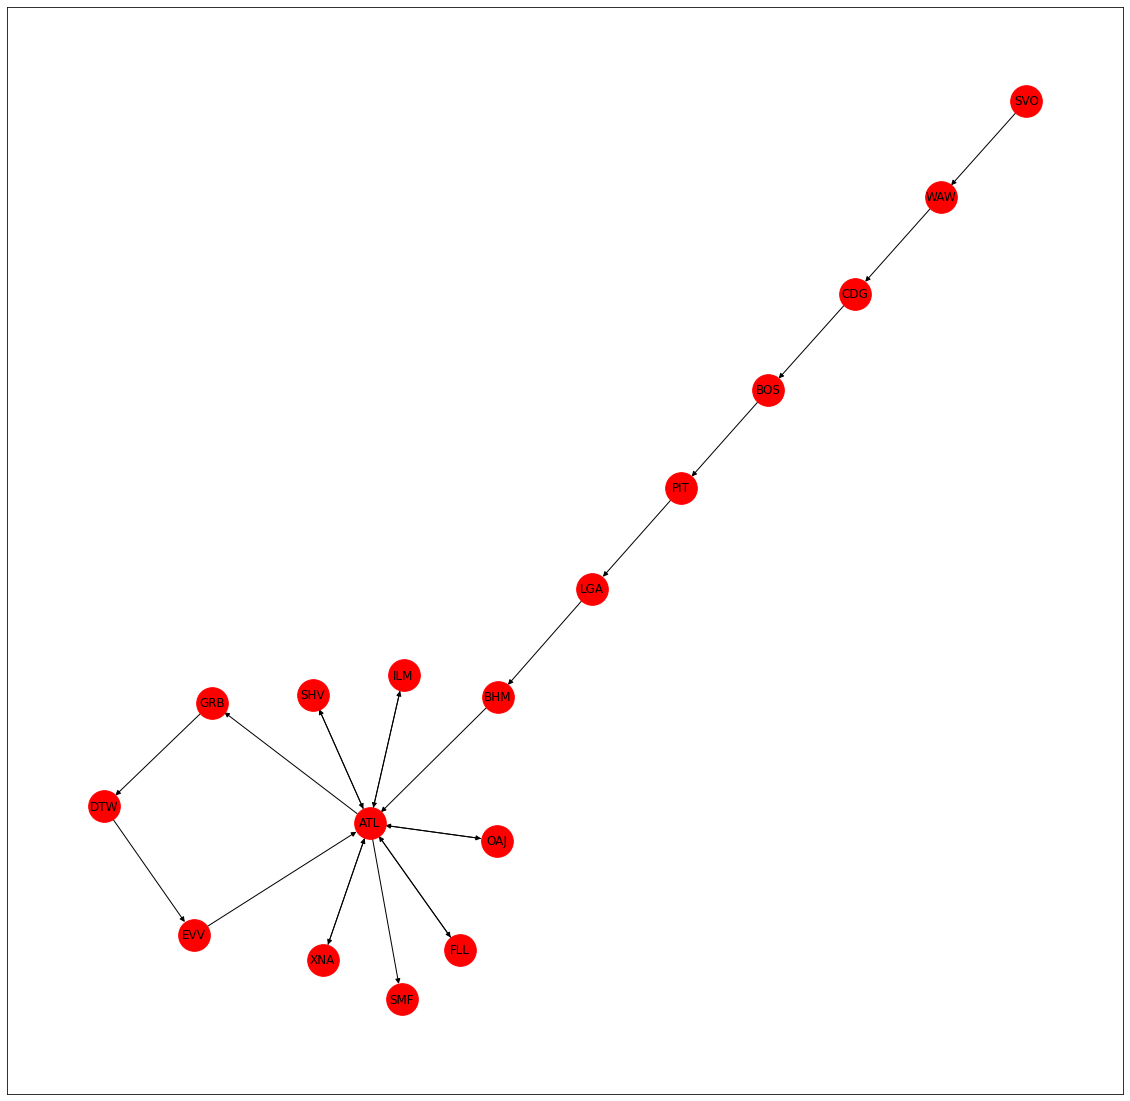

In [ ]:
plt.figure(figsize=(20, 20))

nx.draw_networkx(g, pos=nx.kamada_kawai_layout(g), node_color="r", node_size=1000)


In [ ]:
example = df2[df2['cardNumber_2']=='FB 139888197']
example = example.sort_values(by='date_2')


def get_edge(example):
  edge={}
  for rows in example.iterrows():
    try:
      edge[rows[1]['departure_2']].append(rows[1]['arrival_2'])
    except KeyError:
      edge[rows[1]['departure_2']]=[rows[1]['arrival_2']]
  return edge
edge = get_edge(example)
print(edge)

{'KEJ': ['SVO'], 'NOZ': ['SVO'], 'SVO': ['IKA', 'AER'], 'IKA': ['PEK'], 'AER': ['LED'], 'PEK': ['rea'], 'LED': ['PRG'], 'PRG': ['DXB'], 'rea': ['YNZ'], 'DXB': ['JED'], 'JED': ['AHB', 'BEY', 'AQI'], 'AHB': ['RUH', 'DMM'], 'YNZ': ['SHA'], 'RUH': ['AHB', 'MED', 'DMM'], 'SHA': ['TVX', 'DQA', 'WUH', 'CTU'], 'TVX': ['SHA'], 'DMM': ['JED'], 'BEY': ['FCO'], 'FCO': ['TIA', 'MAD'], 'TIA': ['FCO'], 'DQA': ['SHA'], 'MAD': ['JED'], 'WUH': ['KMG'], 'AQI': ['RUH'], 'MED': ['RUH'], 'KMG': ['SHA'], 'CTU': ['SHE'], 'SHE': ['HGH'], 'HGH': ['TYN']}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from(edge.keys())
for k, v in edge.items():
    g.add_edges_from(([(k, t) for t in v]))
print(g.edges())

[('KEJ', 'SVO'), ('NOZ', 'SVO'), ('SVO', 'IKA'), ('SVO', 'AER'), ('IKA', 'PEK'), ('AER', 'LED'), ('PEK', 'rea'), ('LED', 'PRG'), ('PRG', 'DXB'), ('rea', 'YNZ'), ('DXB', 'JED'), ('JED', 'AHB'), ('JED', 'BEY'), ('JED', 'AQI'), ('AHB', 'RUH'), ('AHB', 'DMM'), ('YNZ', 'SHA'), ('RUH', 'AHB'), ('RUH', 'MED'), ('RUH', 'DMM'), ('SHA', 'TVX'), ('SHA', 'DQA'), ('SHA', 'WUH'), ('SHA', 'CTU'), ('TVX', 'SHA'), ('DMM', 'JED'), ('BEY', 'FCO'), ('FCO', 'TIA'), ('FCO', 'MAD'), ('TIA', 'FCO'), ('DQA', 'SHA'), ('MAD', 'JED'), ('WUH', 'KMG'), ('AQI', 'RUH'), ('MED', 'RUH'), ('KMG', 'SHA'), ('CTU', 'SHE'), ('SHE', 'HGH'), ('HGH', 'TYN')]


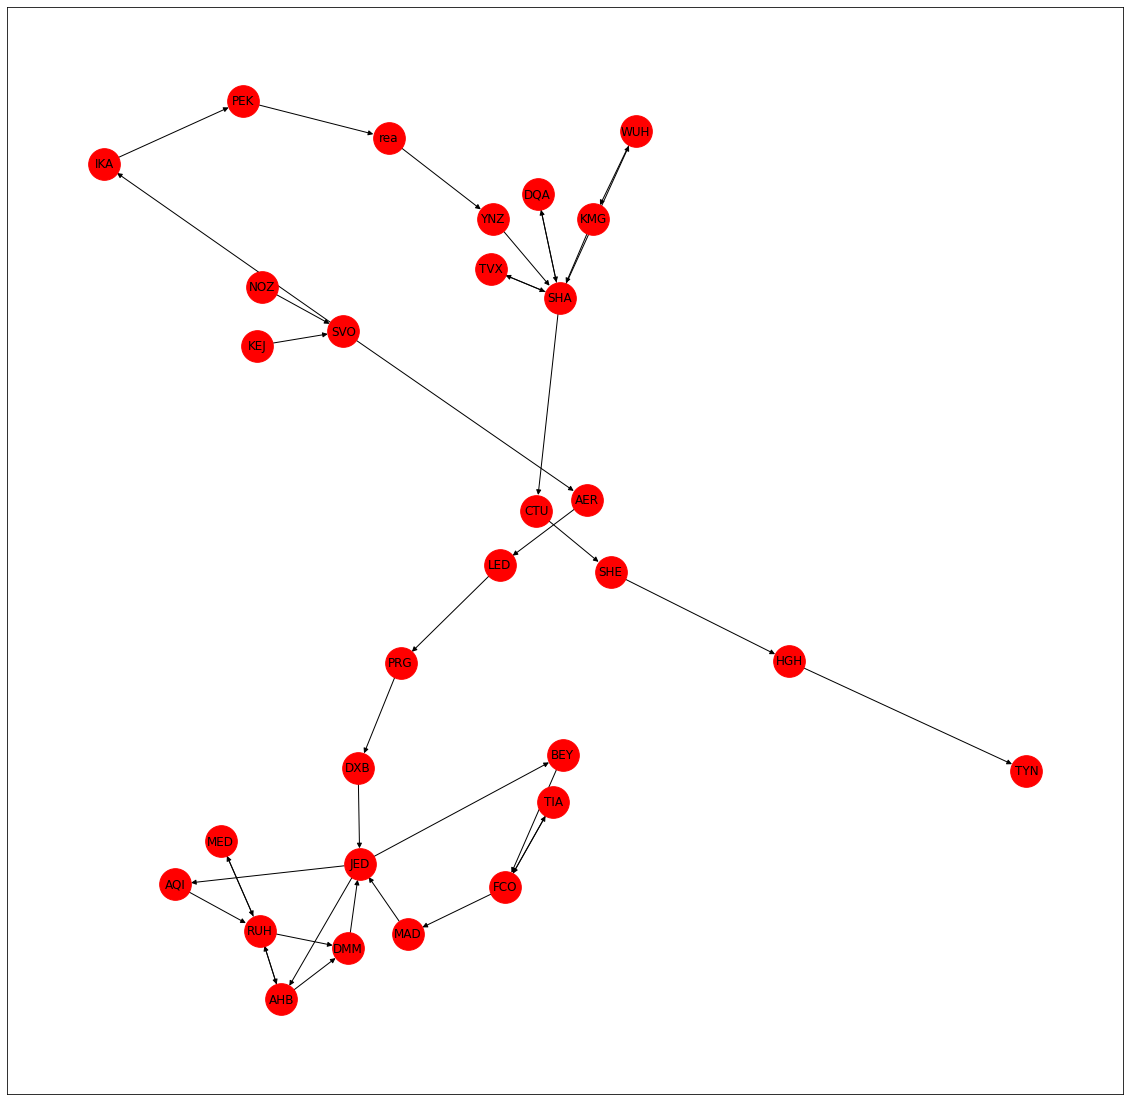

In [ ]:
plt.figure(figsize=(20, 20))

nx.draw_networkx(g, pos=nx.kamada_kawai_layout(g), node_color="r", node_size=1000)


In [ ]:
216617553.0

In [ ]:
df2['cardNumber_2'] = df2['cardNumber_2'].apply(lambda x: x[3:])
df2.head()

,nickName_2,firstName_2,lastName_2,sex_2,cardNumber_2,date_2,arrival_2,flight_2,departure_2
0,FrequentFlyer0,NaN,NaN,Male,889215424,2017-03-04,PIT,DL3377,BOS
1,FrequentFlyer0,NaN,NaN,Male,889215424,2017-07-21,DTW,DL3630,GRB
2,FrequentFlyer0,NaN,NaN,Male,889215424,2017-03-22,LGA,DL5361,PIT
3,FrequentFlyer0,NaN,NaN,Male,889215424,2017-01-04,WAW,SU3702,SVO
4,FrequentFlyer0,NaN,NaN,Male,889215424,2017-08-08,ATL,DL3412,XNA


In [ ]:
cardNumber_2='KE 889215424'
print(int(cardNumber_2[3:]))

889215424


In [ ]:
df2[df2['cardNumber_2']=='226793437'].head()

,nickName_2,firstName_2,lastName_2,sex_2,cardNumber_2,date_2,arrival_2,flight_2,departure_2
